# SVM for classification

Load IRIS dataset, check its contents:


In [1]:
from sklearn.datasets import load_iris   #Iris data set
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])  #target ayrı yazdırıp bak iki gruba göre bakcaz target number 0 and 1 için
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [2]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)  #arrange how much data is tested or trained by test size function
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)
print(y_test)

(150, 4)
(150,)
(135, 4)
(15, 4)
(135,)
(15,)
[1 0 2 2 1 2 1 2 0 0 0 0 1 0 1 1 1 0 2 1 2 1 1 2 1 0 0 1 1 1 0 0 1 0 0 2 2
 0 1 0 2 2 0 1 1 0 0 2 2 0 2 2 2 1 0 0 1 0 2 1 1 2 0 1 0 0 2 0 2 1 2 0 0 0
 1 0 1 1 1 2 2 2 0 1 0 2 0 2 0 0 1 1 2 2 0 0 1 2 2 1 0 2 2 1 2 2 0 2 1 1 2
 0 2 2 0 0 1 2 0 1 2 0 0 2 0 2 0 2 1 1 1 1 0 2 1]
[2 1 2 2 2 1 2 1 1 1 1 1 0 2 0]


Use a Support Vector Machine for classification:


In [3]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
# show a score on how well it was done
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [ ]:
X=iris.data[:,0:2]
X.shape

(150, 2)

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

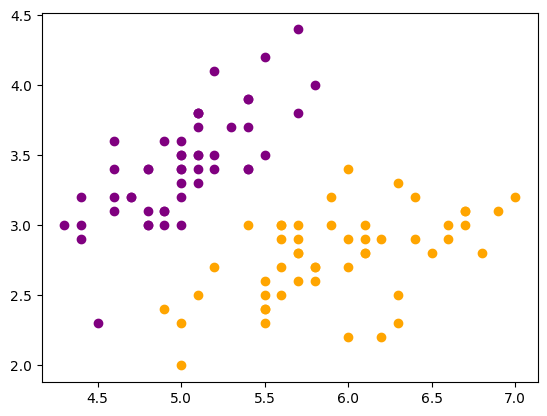

In [4]:
import matplotlib.pyplot as plt
#plt.scatter(X|[:,0],[:,1])
plt.scatter(X[y==0,0],X[y==0,1], color='purple')  #This line filters only the rows where y == 0, meaning it selects points belonging to a specific class/category
plt.scatter(X[y==1,0],X[y==1,1], color='orange')
plt.show()


# Feature number 2 is too intertwined, so we are not including it. To separate the data, we are not using columns 3-4.



Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [5]:
# If you remove 2, you get a better score because it does not mix. However, if you remove 0, you get a lower score.sı
X=iris.data[iris.target!=2,0:2]
print(X.shape)
y=iris.target[iris.target!=2]
#C parameter in an SVM (Support Vector Machine) controls the trade-off between achieving a low error and maintaining a simple decision boundary
SVMmodel_1=SVC(kernel='linear', C=200)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y,test_size=0.2)
SVMmodel_1.fit(X_train_1,y_train_1)
#print(SVMmodel_1.get_params())
SVMmodel_1.score(X_test_1,y_test_1)



(100, 2)


1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

[[ 6.28430616 -5.14210451]]
[-17.45222435]


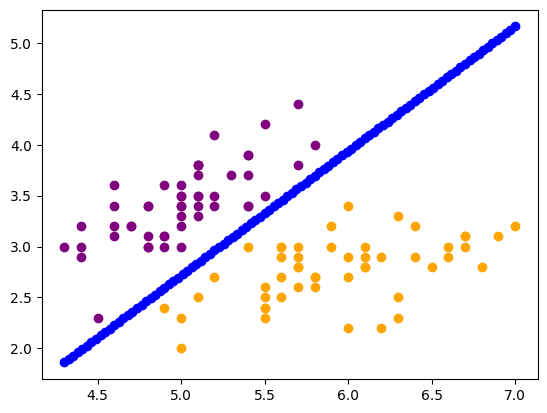

In [6]:
supvectors=SVMmodel.support_vectors_
# Plot the support vectors here


#Separating line coefficients:
W=SVMmodel_1.coef_
b=SVMmodel_1.intercept_
print(W)
print(b)
import numpy as np
x1=np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2=-b/W[0,1]-W[0,0]/W[0,1]*x1
plt.scatter(X[y==0,0],X[y==0,1], color='purple')
plt.scatter(X[y==1,0],X[y==1,1], color='orange')
plt.scatter(x1,x2,color='blue')
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

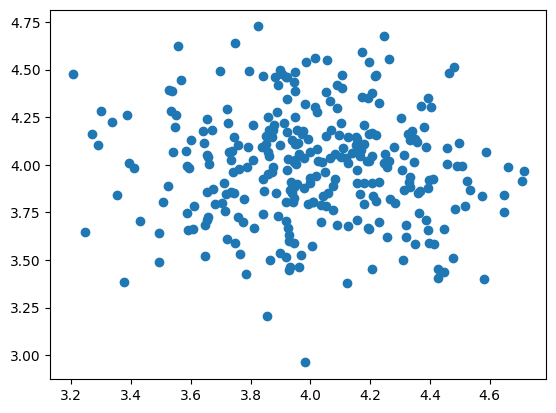

In [7]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4)) #sonuncu mean value of the sample ?

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

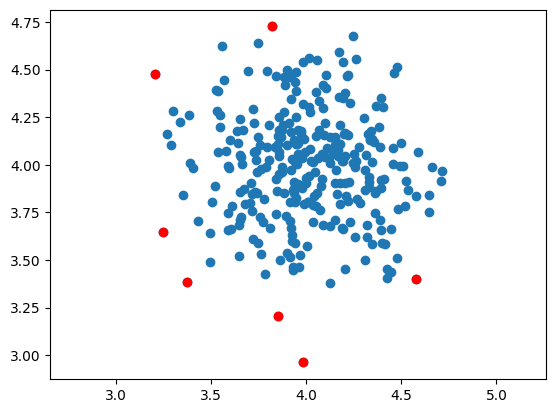

In [8]:
# classification , try to find outliers
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)  # classification ,outliers bulmaya çalışıyorsun


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')  #ooutlier olanları boyadık
plt.axis('equal')
plt.show()



Plot the support vectors:

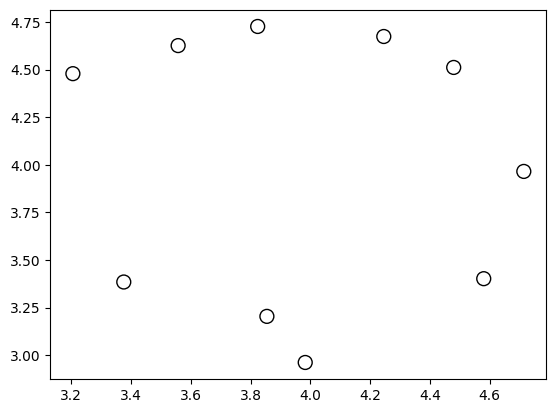

In [9]:
# Get support vectors
support_vectors = SVMmodelOne.support_vectors_

# Plot support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            edgecolors='black', facecolors='none', s=100, label="Support Vectors")

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.989098620408397


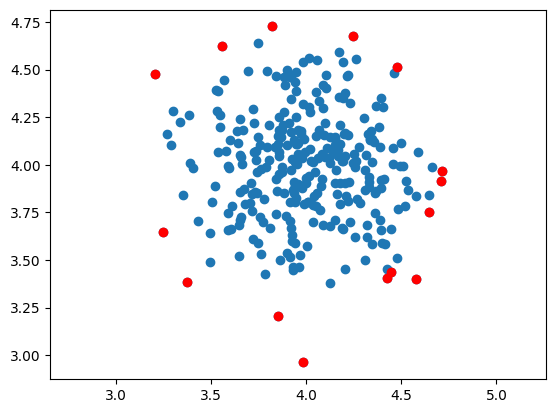

In [11]:
scores = SVMmodelOne.score_samples(x)   #quantile bak
#Decide what percentage will be outliers.
thresh = quantile(scores, 0.05)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()